### Name : Shivanka Priyashan
### Index : 190476V

[]

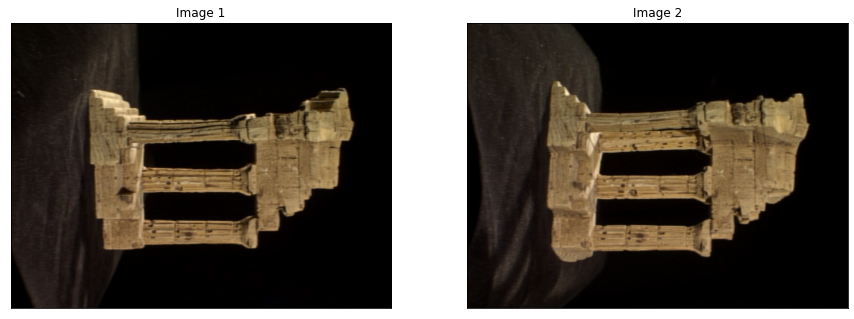

In [2]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
f = open(r'./templeSR_par.txt','r')
assert f is not None

n = int(f.readline())
l = f.readline().split()
im1_fn = l[0]s
#for first image
K1 = np.array([float(i) for i in l[1:10]]).reshape((3,3))
R1 = np.array([float(i) for i in l[10:19]]).reshape((3,3))
t1 = np.array([float(i) for i in l[19:22]]).reshape((3,1))

#for second image
l = f.readline().split()
im2_fn = l[0]
K2 = np.array([float(i) for i in l[1:10]]).reshape((3,3))
R2 = np.array([float(i) for i in l[10:19]]).reshape((3,3))
t2 = np.array([float(i) for i in l[19:22]]).reshape((3,1))

# Read the two image sand show
im1 =  cv.imread(r'./'+im1_fn , cv.IMREAD_COLOR)
im2 =  cv.imread(r'./'+ im2_fn , cv.IMREAD_COLOR)
assert im1 is not None
assert im2 is not None
fig , ax =  plt.subplots(1,2,figsize=(15,15))
ax[0].imshow(cv.cvtColor(im1, cv.COLOR_BGR2RGB))
ax[0].set_title('Image 1')
ax[0].set_xticks([]), ax[0].set_yticks([])

ax[1].imshow(cv.cvtColor(im2, cv.COLOR_BGR2RGB))
ax[1].set_title('Image 2')
ax[1].set_xticks([]), ax[1].set_yticks([])

plt.plot()

##### Question 01

In [8]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

sift = cv.SIFT_create()
# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(im1,None)
kp2, des2 = sift.detectAndCompute(im2,None)

FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=100)
flann = cv.FlannBasedMatcher(index_params,search_params)
matches = flann.knnMatch(des1,des2,k=2)
pts1 = []
pts2 = []

for i,(m,n) in enumerate(matches):
    if m.distance < 0.7*n.distance:
        pts2.append(kp2[m.trainIdx].pt)
        pts1.append(kp1[m.queryIdx].pt)
        
pts1 = np.array(pts1)
pts2 = np.array(pts2)

##### Question 02

In [13]:
#Fundamental matrix
F, mask = cv.findFundamentalMat(pts1,pts2,cv.FM_RANSAC)

#Essential matrix
E = K2.T@F@K1

##### Question 03

In [10]:
retval,R,t,mask = cv.recoverPose(E,pts1,pts2,K1)

R_t_1 = np.concatenate((R1,t1),axis=1)

R2_ = R1 @ R
t2_ = R1 @ t
R_t_2 = np.concatenate((R2_,t2_),axis = 1)

P1 = K1 @ np.hstack((R1,t1))

##### Question 04

In [14]:
#Cameras matrix P2
P2_=K2@R_t_2

##### Question 05

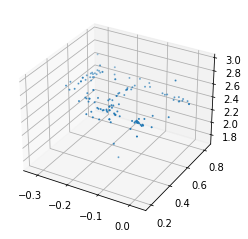

In [16]:
#3D point locations
points4d = cv.triangulatePoints(P1,P2_,pts1.T,pts2.T)
points4d /= points4d[3,:]

import matplotlib.pyplot as plt

X = points4d[0,:]
Y = points4d[1,:]
Z = points4d[2,:]

fig = plt.figure(1)
ax = fig.add_subplot(111,projection = '3d')

ax.scatter(X,Y,Z,s=1,cmap ='gray')
plt.show()